In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

df = pd.read_csv("/content/drive/MyDrive/Elevate/Walmart_Sales.csv")
print("First 5 rows of the dataset:")
print(df.head())




First 5 rows of the dataset:
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [5]:
print("\nMissing values in data:")
print(df.isnull().sum())


Missing values in data:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [6]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [7]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.23

In [8]:
X = df[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]  # Independent variables
y = df['Weekly_Sales']  # Target variable


In [10]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (5148, 4)
Testing set size: (1287, 4)


In [11]:
# Initializing the Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

print("\nModel intercept (bias term):", model.intercept_)
print("\nModel coefficients for each feature:")
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)



Model intercept (bias term): 1789909.7866092026

Model coefficients for each feature:
               Coefficient
Temperature    -686.159123
Fuel_Price   -22242.584135
CPI           -1632.232081
Unemployment -43596.969808


In [12]:
# Predicting the results
y_pred = model.predict(X_test)

# Evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")



Model Evaluation Metrics:
Mean Absolute Error (MAE): 475178.08
Mean Squared Error (MSE): 316517319524.90
R² Score: 0.0175


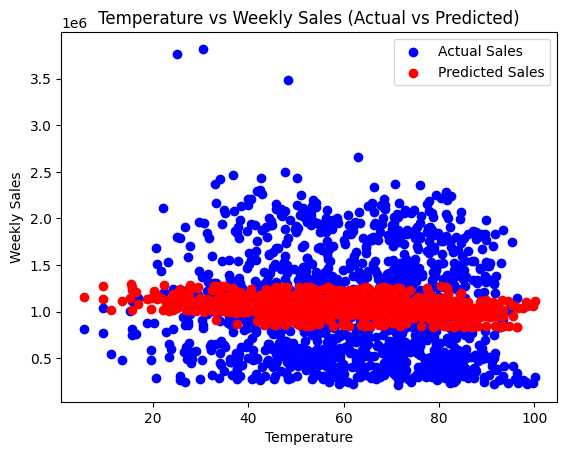


Interpretation of Coefficients:
Every 1 unit increase in 'Temperature' changes 'Weekly Sales' by -686.16 units (assuming others constant).
Every 1 unit increase in 'Fuel_Price' changes 'Weekly Sales' by -22242.58 units (assuming others constant).
Every 1 unit increase in 'CPI' changes 'Weekly Sales' by -1632.23 units (assuming others constant).
Every 1 unit increase in 'Unemployment' changes 'Weekly Sales' by -43596.97 units (assuming others constant).


In [13]:

# Scatter plot: Actual sales
plt.scatter(X_test['Temperature'], y_test, color='blue', label='Actual Sales')

# Scatter plot: Predicted sales
plt.scatter(X_test['Temperature'], y_pred, color='red', label='Predicted Sales')

plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Temperature vs Weekly Sales (Actual vs Predicted)')
plt.legend()
plt.show()

# Interpretation of Coefficients
print("\nInterpretation of Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"Every 1 unit increase in '{feature}' changes 'Weekly Sales' by {coef:.2f} units (assuming others constant).")


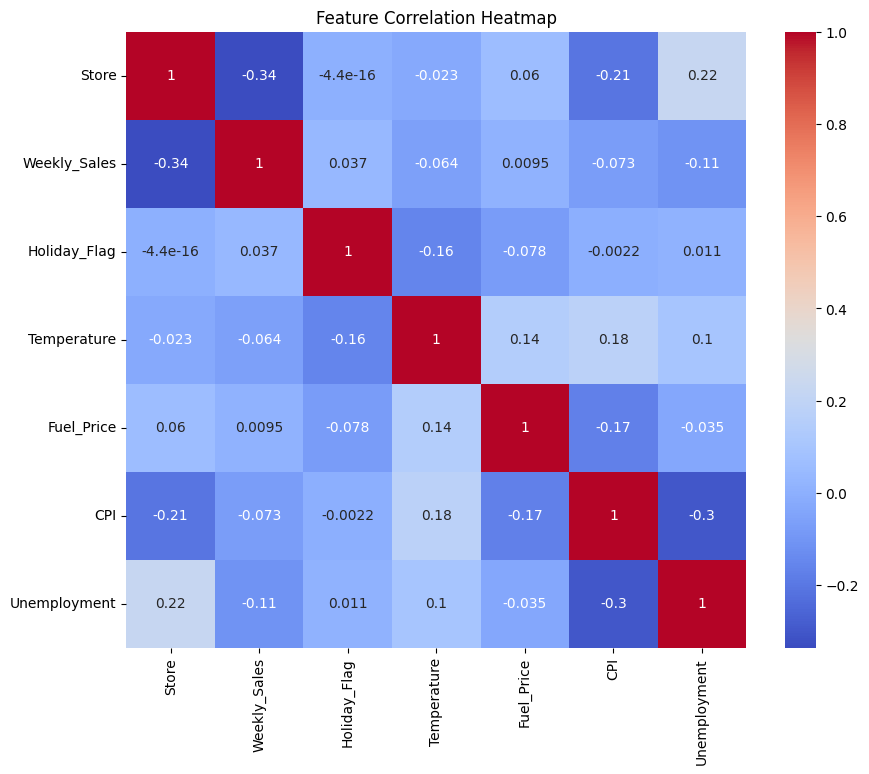

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fix date parsing
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Now select only numerical columns for heatmap
numerical_features = df.select_dtypes(include=[np.number])

# Plot correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [17]:
from sklearn.model_selection import cross_val_score

model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validation R2 scores:", scores)
print("Average CV R2 score:", scores.mean())


Cross-validation R2 scores: [ 0.00118089 -0.27692717 -0.31499348 -0.4869919  -1.04426307]
Average CV R2 score: -0.4243989470161674
